In [1]:
import numpy as np
import matplotlib.pyplot as plt
from files_sorting import Txt_Reading
import pandas as pd
import os

%matplotlib inline

# Unfolding

In [2]:
folder = "res/1nM/"
f_MAX = [10, 15, 20, 25, 30, 35]
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

res_unfold_1nM = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])
lengths = [0]

for i, f in enumerate(f_MAX):
    path = f'{folder}f_max{f}_unfolding.txt'
    if os.path.isfile(path):
        data = np.loadtxt(path)
        for j in range(data.shape[0]):
            res_unfold_1nM.loc[j+sum(lengths), :-2] = data[j] 
        res_unfold_1nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -2] = [colors[i]] * data.shape[0]
        res_unfold_1nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -1] = [markers[i]] * data.shape[0]
        lengths.append(data.shape[0])

res_unfold_1nM

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,2.0,4.83228,4.39758,10.132074,31.310068,1.94386,#7afdd6,D
1,2.0,6.3521,5.8411,13.132017,36.605534,14.60319,#7afdd6,D
2,2.0,3.8268,3.339,11.61299,39.933701,18.16394,#7afdd6,D
3,2.0,2.8944,2.4033,13.841662,55.45638,21.91258,#7afdd6,D
4,2.0,6.5369,5.9363,13.284067,36.677234,25.72632,#7afdd6,D
...,...,...,...,...,...,...,...,...
715,21.0,5.1968,4.4999,19.707376,59.121414,363.80347,#613a3a,1
716,21.0,5.0232,4.42758,15.531105,47.232402,374.69638,#613a3a,1
717,21.0,5.64374,5.20606,11.699045,34.004108,386.52704,#613a3a,1
718,21.0,5.7662,5.2137,14.599089,42.09968,398.30875,#613a3a,1


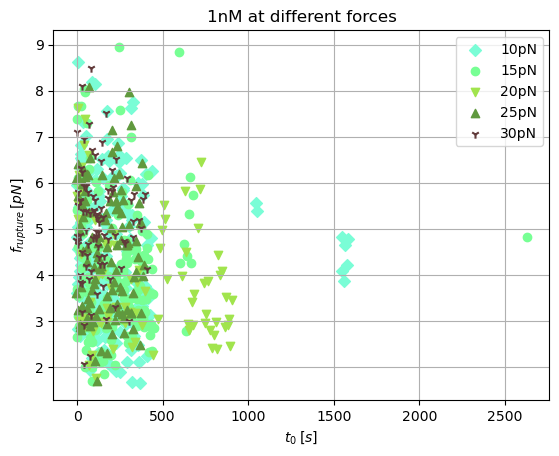

In [3]:
lengths = np.array(lengths).cumsum()
for i in range(res_unfold_1nM.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_unfold_1nM.t_0[i], res_unfold_1nM.f[i], c=res_unfold_1nM.c[i], marker=res_unfold_1nM.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("1nM at different forces")
plt.savefig("imgs/1nM/different_forces_unfolded.png", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
folder = "res/4nM/"

res_unfold_4nM = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])
lengths = [0]

for i, f in enumerate(f_MAX):
    path = f'{folder}f_max{f}_unfolding.txt'
    if os.path.isfile(path):
        data = np.loadtxt(path)
        for j in range(data.shape[0]):
            res_unfold_4nM.loc[j+sum(lengths), :-2] = data[j] 
        res_unfold_4nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -2] = [colors[i]] * data.shape[0]
        res_unfold_4nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -1] = [markers[i]] * data.shape[0]
        lengths.append(data.shape[0])

res_unfold_4nM

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,1.0,3.0247,2.5004,13.308942,51.957643,16.41797,#7afdd6,D
1,1.0,3.0645,2.5469,12.509023,48.466768,20.89355,#7afdd6,D
2,1.0,2.8654,2.3527,12.444366,50.159322,25.43555,#7afdd6,D
3,1.0,6.3165,5.6777,15.771326,44.046177,31.31348,#7afdd6,D
4,1.0,3.46938,3.12624,8.488686,30.702833,44.34277,#7afdd6,D
...,...,...,...,...,...,...,...,...
395,18.0,5.7942,5.2168,14.310851,41.195815,4686.29456,#e3b505,8
396,18.0,6.9937,6.3019,18.404525,49.726831,4699.66272,#e3b505,8
397,18.0,3.6937,3.0366,14.273141,49.96519,4711.66419,#e3b505,8
398,18.0,4.2014,3.5692,15.00745,49.335568,4724.89954,#e3b505,8


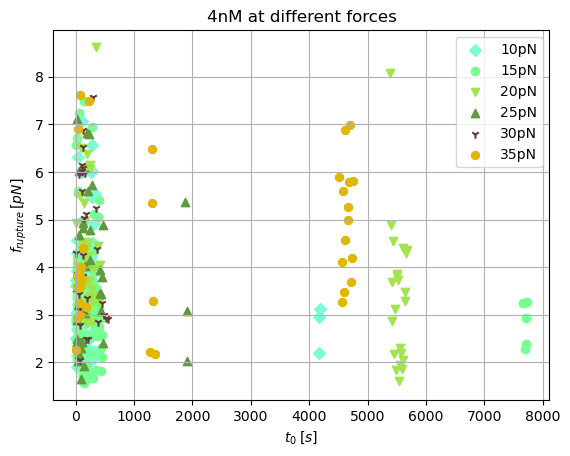

In [5]:
lengths = np.array(lengths).cumsum()
for i in range(res_unfold_4nM.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_unfold_4nM.t_0[i], res_unfold_4nM.f[i], c=res_unfold_4nM.c[i], marker=res_unfold_4nM.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("4nM at different forces")
plt.savefig("imgs/4nM/different_forces_unfolded.png", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
folder = "res/10nM/"

res_unfold_10nM = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])
lengths = [0]

for i, f in enumerate(f_MAX):
    path = f'{folder}f_max{f}_unfolding.txt'
    if os.path.isfile(path):
        data = np.loadtxt(path)
        for j in range(data.shape[0]):
            res_unfold_10nM.loc[j+sum(lengths), :-2] = data[j] 
        res_unfold_10nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -2] = [colors[i]] * data.shape[0]
        res_unfold_10nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -1] = [markers[i]] * data.shape[0]
        lengths.append(data.shape[0])

res_unfold_10nM

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,1.0,5.7448,5.237,12.030674,34.740219,-1.22559,#7afdd6,D
1,1.0,4.2764,3.7289,13.357615,43.553846,18.50342,#7afdd6,D
2,1.0,2.1759,1.479,11.394746,54.869087,39.67676,#7afdd6,D
3,1.0,2.2058,1.6151,10.392207,49.573499,43.78613,#7afdd6,D
4,1.0,3.9578,3.2942,16.000406,54.116757,52.14404,#7afdd6,D
...,...,...,...,...,...,...,...,...
426,17.0,6.7164,6.1589,11.557585,31.630108,368.64013,#e3b505,8
427,17.0,4.7851,4.2874,10.635614,33.002043,381.22216,#e3b505,8
428,17.0,3.0928,2.6448,10.480968,40.394989,471.11035,#e3b505,8
429,17.0,5.1784,4.6906,11.124004,33.418578,497.3977,#e3b505,8


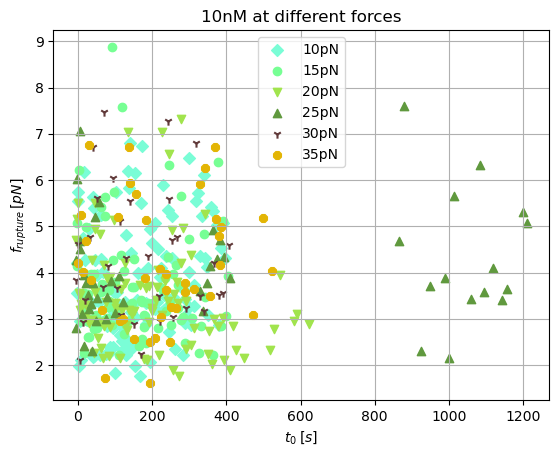

In [7]:
lengths = np.array(lengths).cumsum()
for i in range(res_unfold_10nM.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_unfold_10nM.t_0[i], res_unfold_10nM.f[i], c=res_unfold_10nM.c[i], marker=res_unfold_10nM.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("10nM at different forces")
plt.savefig("imgs/10nM/different_forces_unfolded.png", dpi=300, bbox_inches='tight')
plt.show()

# Different concentrations per force

In [8]:
folders = ["1nM", "4nM", "10nM"]
tot_lengths = [0]
res_unfold = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])

for i, f in enumerate(f_MAX):
    lengths = [0]
    for fold in folders:
        path = f'res/{fold}/f_max{f}_unfolding.txt'
        if os.path.isfile(path):
            data = np.loadtxt(path)
            for j in range(data.shape[0]):
                res_unfold.loc[j+tot_lengths[-1]+sum(lengths), :-2] = data[j] 
            res_unfold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -2] = [colors[i]] * data.shape[0]   # same color for the same force
            res_unfold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -1] = [markers[i]] * data.shape[0]  # same marker for the same force
            lengths.append(data.shape[0])

    tot_lengths.append(res_unfold.shape[0])

res_unfold

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,2.0,4.83228,4.39758,10.132074,31.310068,1.94386,#7afdd6,D
1,2.0,6.3521,5.8411,13.132017,36.605534,14.60319,#7afdd6,D
2,2.0,3.8268,3.339,11.61299,39.933701,18.16394,#7afdd6,D
3,2.0,2.8944,2.4033,13.841662,55.45638,21.91258,#7afdd6,D
4,2.0,6.5369,5.9363,13.284067,36.677234,25.72632,#7afdd6,D
...,...,...,...,...,...,...,...,...
1546,17.0,6.7164,6.1589,11.557585,31.630108,368.64013,#e3b505,8
1547,17.0,4.7851,4.2874,10.635614,33.002043,381.22216,#e3b505,8
1548,17.0,3.0928,2.6448,10.480968,40.394989,471.11035,#e3b505,8
1549,17.0,5.1784,4.6906,11.124004,33.418578,497.3977,#e3b505,8


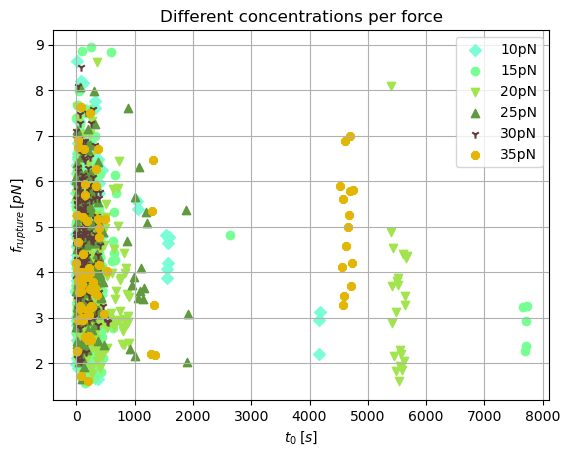

In [9]:
lengths = np.array(tot_lengths)
for i in range(res_unfold.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_unfold.t_0[i], res_unfold.f[i], c=res_unfold.c[i], marker=res_unfold.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("Different concentrations per force")
plt.savefig("imgs/different_concentrations_per_force_unfolded.png", dpi=300, bbox_inches='tight')
plt.show()

# Different forces per concentration

In [10]:
folders = ["1nM", "4nM", "10nM"]
tot_lengths = [0]
res_unfold = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])

for i, fold in enumerate(folders):
    lengths = [0]
    for f in f_MAX:
        path = f'res/{fold}/f_max{f}_unfolding.txt'
        if os.path.isfile(path):
            data = np.loadtxt(path)
            for j in range(data.shape[0]):
                res_unfold.loc[j+tot_lengths[-1]+sum(lengths), :-2] = data[j] 
            res_unfold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -2] = [colors[i]] * data.shape[0]   # same color for the same force
            res_unfold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -1] = [markers[i]] * data.shape[0]  # same marker for the same force
            lengths.append(data.shape[0])

    tot_lengths.append(res_unfold.shape[0])

res_unfold

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,2.0,4.83228,4.39758,10.132074,31.310068,1.94386,#7afdd6,D
1,2.0,6.3521,5.8411,13.132017,36.605534,14.60319,#7afdd6,D
2,2.0,3.8268,3.339,11.61299,39.933701,18.16394,#7afdd6,D
3,2.0,2.8944,2.4033,13.841662,55.45638,21.91258,#7afdd6,D
4,2.0,6.5369,5.9363,13.284067,36.677234,25.72632,#7afdd6,D
...,...,...,...,...,...,...,...,...
1546,17.0,6.7164,6.1589,11.557585,31.630108,368.64013,#a1e44d,v
1547,17.0,4.7851,4.2874,10.635614,33.002043,381.22216,#a1e44d,v
1548,17.0,3.0928,2.6448,10.480968,40.394989,471.11035,#a1e44d,v
1549,17.0,5.1784,4.6906,11.124004,33.418578,497.3977,#a1e44d,v


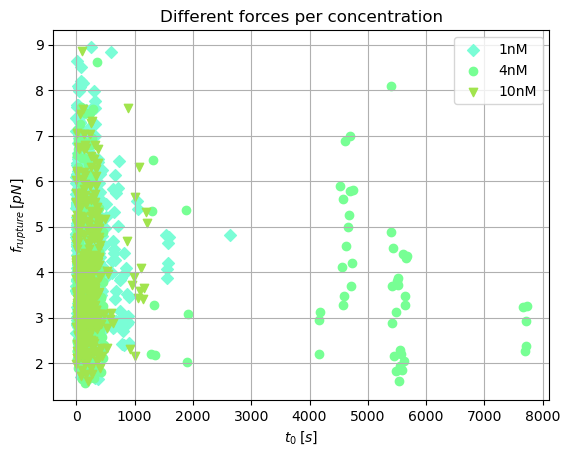

In [11]:
lengths = np.array(tot_lengths)
for i in range(res_unfold.shape[0]):
    label = f'{folders[np.where(lengths == i)[0][0]]}' if i in lengths else ''
    plt.scatter(res_unfold.t_0[i], res_unfold.f[i], c=res_unfold.c[i], marker=res_unfold.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("Different forces per concentration")
plt.savefig("imgs/different_forces_per_concentration_unfolded.png", dpi=300, bbox_inches='tight')
plt.show()